In [27]:
import pandas as pd
import numpy as np
buildingData = pd.read_csv("DS110 Project Data - FY2021 Emissions Data.csv")
buildingData

,Building Code,E (kWh),G(therms),O(gallon)
0,500,"9,437,760.00","1,718,131.00",NaN
1,501,NaN,"16,406.00",NaN
2,504,"10,685.00",NaN,"3,385.40"
3,505,NaN,"1,020.00",NaN
4,506,"12,572.00","1,348.00",NaN
...,...,...,...,...
265,961,"1,104,060.00",NaN,NaN
266,962,"791,546.00",471,NaN
267,964,"79,974.00","4,200.00",NaN
268,966,"318,865.00","2,930.00",NaN


In [28]:
energyUsageData = pd.read_csv("DS110 Project Data - Space@BU.csv")
energyUsageData

,Site Code,Building Code,Building Type,Street 1 Number,Street 1 Address,Gross,Height,Stories
0,CRC,500,Residential,10,BUICK STREET,384941.16,195',B+G+19
1,CRC,501,Student Support,915,COMMONWEALTH AVENUE,285033.33,55',2L + 4
2,CRC,503,Athletic,925,COMMONWEALTH AVENUE,550208.11,67',2LL +B + 4
3,CRC,504,Academic,116,BAY STATE ROAD,4864.73,44',B + 4
4,CRC,505,Administrative,122,BAY STATE ROAD,5531.46,37',B + 4
...,...,...,...,...,...,...,...,...
248,CRC,515A,Residential,83,BAY STATE ROAD,10175.32,45',5
249,CRC,586A,Residential,42,BUSWELL STREET,17182.29,39',B+5
250,CRC,586B,Residential,44,BUSWELL STREET,14771.96,60',B+5
251,CRC,586C,Residential,48,BUSWELL STREET,16337.13,60',B+5


In [29]:
##Dropping building codes with letters in them so we can have all integer values in both data sets' column "Building Type." This made it possible to marge the sets.
energyUsageData = energyUsageData.drop(index = np.arange(248, 253))
energyUsageData

,Site Code,Building Code,Building Type,Street 1 Number,Street 1 Address,Gross,Height,Stories
0,CRC,500,Residential,10,BUICK STREET,384941.16,195',B+G+19
1,CRC,501,Student Support,915,COMMONWEALTH AVENUE,285033.33,55',2L + 4
2,CRC,503,Athletic,925,COMMONWEALTH AVENUE,550208.11,67',2LL +B + 4
3,CRC,504,Academic,116,BAY STATE ROAD,4864.73,44',B + 4
4,CRC,505,Administrative,122,BAY STATE ROAD,5531.46,37',B + 4
...,...,...,...,...,...,...,...,...
243,CRC,993,Residential,519,BEACON STREET,6049.48,45',B+4
244,CRC,994,Residential,521,BEACON STREET,6383.45,54',B+4
245,CRC,995,Residential,872,BEACON STREET,6334.96,48',B+4
246,CRC,996,Residential,726,COMMONWEALTH AVENUE,28278.39,"51""",B+5


In [30]:
energyUsageData["Building Code"] = energyUsageData["Building Code"].astype(int)

In [31]:
mergedDataSet = pd.merge(buildingData, energyUsageData, on="Building Code", how= 'inner')
mergedDataSet

,Building Code,E (kWh),G(therms),O(gallon),Site Code,Building Type,Street 1 Number,Street 1 Address,Gross,Height,Stories
0,500,"9,437,760.00","1,718,131.00",NaN,CRC,Residential,10,BUICK STREET,384941.16,195',B+G+19
1,501,NaN,"16,406.00",NaN,CRC,Student Support,915,COMMONWEALTH AVENUE,285033.33,55',2L + 4
2,504,"10,685.00",NaN,"3,385.40",CRC,Academic,116,BAY STATE ROAD,4864.73,44',B + 4
3,505,NaN,"1,020.00",NaN,CRC,Administrative,122,BAY STATE ROAD,5531.46,37',B + 4
4,506,"12,572.00","1,348.00",NaN,CRC,Residential,112,BAY STATE ROAD,4961.74,44',B+4
...,...,...,...,...,...,...,...,...,...,...,...
228,955,"29,448.00",NaN,NaN,CRC,Residential,98,MOUNTFORT STREET,10389.26,45',B + 4
229,956,"37,320.00",NaN,NaN,CRC,Residential,100,MOUNTFORT STREET,7270.96,45',B + 4
230,957,"7,246,560.00","24,103.00",NaN,CRC,Residential,275,BABCOCK STREET,156993.89,136',B + 13
231,966,"318,865.00","2,930.00",NaN,CRC,Administrative,32,HARRY AGGANIS WAY,17351.66,43',3 + P


In [32]:
import re
pattern2 = r'(\d+)(\'|")?\s*,?\s*(\d+)?(\'|")?\s*,?\S*(\d+)?(\'|")?'
#(/d+) this is group one: any digit
#(\'|") this is group two: either ' or " with ? meaning optional
#\s* 0 to any amount of white space
#,? an optional comma


In [33]:
def converter(string):
    string= str(string)
    matches = re.search(pattern2, string)
    if matches:
        feet = int(matches.group(1))
        #it's group three here since group two is just the quotation mark
        inch = int(matches.group(3))if matches.group(3) else 0
        convert = round((feet * 0.3048 + inch * 0.0254), 2)
        return convert
mergedDataSet['Height'] = mergedDataSet['Height'].apply(converter)
afterConvertData = mergedDataSet

In [34]:
afterConvertData
#As of this point, we have merged the data sets on building code,  
#and standardized the gross square footage into metric units. 

,Building Code,E (kWh),G(therms),O(gallon),Site Code,Building Type,Street 1 Number,Street 1 Address,Gross,Height,Stories
0,500,"9,437,760.00","1,718,131.00",NaN,CRC,Residential,10,BUICK STREET,384941.16,59.44,B+G+19
1,501,NaN,"16,406.00",NaN,CRC,Student Support,915,COMMONWEALTH AVENUE,285033.33,16.76,2L + 4
2,504,"10,685.00",NaN,"3,385.40",CRC,Academic,116,BAY STATE ROAD,4864.73,13.41,B + 4
3,505,NaN,"1,020.00",NaN,CRC,Administrative,122,BAY STATE ROAD,5531.46,11.28,B + 4
4,506,"12,572.00","1,348.00",NaN,CRC,Residential,112,BAY STATE ROAD,4961.74,13.41,B+4
...,...,...,...,...,...,...,...,...,...,...,...
228,955,"29,448.00",NaN,NaN,CRC,Residential,98,MOUNTFORT STREET,10389.26,13.72,B + 4
229,956,"37,320.00",NaN,NaN,CRC,Residential,100,MOUNTFORT STREET,7270.96,13.72,B + 4
230,957,"7,246,560.00","24,103.00",NaN,CRC,Residential,275,BABCOCK STREET,156993.89,41.45,B + 13
231,966,"318,865.00","2,930.00",NaN,CRC,Administrative,32,HARRY AGGANIS WAY,17351.66,13.11,3 + P


In [35]:
##Below, we eliminated some unecessary columns in our data set, 
## and made sure to specify that we are looking at only Charles River Campus buildings. 
## We also filled all null entries with a 0. 

In [36]:
afterConvertDataCleaned = afterConvertData[afterConvertData["Site Code"]=="CRC"]
afterConvertDataCleaned = afterConvertDataCleaned.drop(["Street 1 Address", "Stories", "Street 1 Number"], axis = 1)
for col in afterConvertDataCleaned.columns:
    afterConvertDataCleaned[col] = afterConvertDataCleaned[col].fillna(0)
#one of the building has no height data, we are giving it a value of 0
afterConvertData.at[159, "Height"] = 0
afterConvertDataCleaned

,Building Code,E (kWh),G(therms),O(gallon),Site Code,Building Type,Gross,Height
0,500,"9,437,760.00","1,718,131.00",0,CRC,Residential,384941.16,59.44
1,501,0,"16,406.00",0,CRC,Student Support,285033.33,16.76
2,504,"10,685.00",0,"3,385.40",CRC,Academic,4864.73,13.41
3,505,0,"1,020.00",0,CRC,Administrative,5531.46,11.28
4,506,"12,572.00","1,348.00",0,CRC,Residential,4961.74,13.41
...,...,...,...,...,...,...,...,...
228,955,"29,448.00",0,0,CRC,Residential,10389.26,13.72
229,956,"37,320.00",0,0,CRC,Residential,7270.96,13.72
230,957,"7,246,560.00","24,103.00",0,CRC,Residential,156993.89,41.45
231,966,"318,865.00","2,930.00",0,CRC,Administrative,17351.66,13.11


In [37]:
data_dropped = 0
for index, row in afterConvertDataCleaned.iterrows():
    if row['E (kWh)']==0:
        afterConvertDataCleaned.drop(index, inplace = True)

In [38]:
afterConvertDataCleaned

,Building Code,E (kWh),G(therms),O(gallon),Site Code,Building Type,Gross,Height
0,500,"9,437,760.00","1,718,131.00",0,CRC,Residential,384941.16,59.44
2,504,"10,685.00",0,"3,385.40",CRC,Academic,4864.73,13.41
4,506,"12,572.00","1,348.00",0,CRC,Residential,4961.74,13.41
5,508,"4,331.00","7,028.00",0,CRC,Residential,8621.75,12.19
6,509,"1,120,900.00","63,950.00",0,CRC,Residential,203525.46,24.38
...,...,...,...,...,...,...,...,...
227,954,"29,110.00","3,835.00",0,CRC,Residential,7231.74,15.85
228,955,"29,448.00",0,0,CRC,Residential,10389.26,13.72
229,956,"37,320.00",0,0,CRC,Residential,7270.96,13.72
230,957,"7,246,560.00","24,103.00",0,CRC,Residential,156993.89,41.45


In [39]:
##We converted all of our data to integer values which could have no commas or dashes. 

In [40]:
def convertColumnToNumeric (df, col):
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('-', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    return df
convertColumnToNumeric(afterConvertDataCleaned, "E (kWh)")
convertColumnToNumeric(afterConvertDataCleaned, "G(therms)")
convertColumnToNumeric(afterConvertDataCleaned, "O(gallon)")
convertColumnToNumeric(afterConvertDataCleaned, "Gross")
convertColumnToNumeric(afterConvertDataCleaned, "Height")

for col in afterConvertDataCleaned.columns:
    afterConvertDataCleaned[col] = afterConvertDataCleaned[col].fillna(0)

afterConvertDataCleaned

,Building Code,E (kWh),G(therms),O(gallon),Site Code,Building Type,Gross,Height
0,500,9437760.0,1718131.0,0.0,CRC,Residential,384941.16,59.44
2,504,10685.0,0.0,3385.4,CRC,Academic,4864.73,13.41
4,506,12572.0,1348.0,0.0,CRC,Residential,4961.74,13.41
5,508,4331.0,7028.0,0.0,CRC,Residential,8621.75,12.19
6,509,1120900.0,63950.0,0.0,CRC,Residential,203525.46,24.38
...,...,...,...,...,...,...,...,...
227,954,29110.0,3835.0,0.0,CRC,Residential,7231.74,15.85
228,955,29448.0,0.0,0.0,CRC,Residential,10389.26,13.72
229,956,37320.0,0.0,0.0,CRC,Residential,7270.96,13.72
230,957,7246560.0,24103.0,0.0,CRC,Residential,156993.89,41.45


In [41]:
def feetToMeterArea (int):
    return round(int * 0.09290304, 2)
afterConvertDataCleaned['Gross'] = afterConvertDataCleaned['Gross'].apply(feetToMeterArea)

In [42]:
afterConvertDataCleaned

,Building Code,E (kWh),G(therms),O(gallon),Site Code,Building Type,Gross,Height
0,500,9437760.0,1718131.0,0.0,CRC,Residential,35762.20,59.44
2,504,10685.0,0.0,3385.4,CRC,Academic,451.95,13.41
4,506,12572.0,1348.0,0.0,CRC,Residential,460.96,13.41
5,508,4331.0,7028.0,0.0,CRC,Residential,800.99,12.19
6,509,1120900.0,63950.0,0.0,CRC,Residential,18908.13,24.38
...,...,...,...,...,...,...,...,...
227,954,29110.0,3835.0,0.0,CRC,Residential,671.85,15.85
228,955,29448.0,0.0,0.0,CRC,Residential,965.19,13.72
229,956,37320.0,0.0,0.0,CRC,Residential,675.49,13.72
230,957,7246560.0,24103.0,0.0,CRC,Residential,14585.21,41.45


# Machine Learning Method 1: Linear Regression

In [43]:
##First, we dropped the third row (O, gallons) since it had too many null entries to be useful. 

In [44]:
afterConvertDataCleaned.drop(["O(gallon)"], axis = 1)

,Building Code,E (kWh),G(therms),Site Code,Building Type,Gross,Height
0,500,9437760.0,1718131.0,CRC,Residential,35762.20,59.44
2,504,10685.0,0.0,CRC,Academic,451.95,13.41
4,506,12572.0,1348.0,CRC,Residential,460.96,13.41
5,508,4331.0,7028.0,CRC,Residential,800.99,12.19
6,509,1120900.0,63950.0,CRC,Residential,18908.13,24.38
...,...,...,...,...,...,...,...
227,954,29110.0,3835.0,CRC,Residential,671.85,15.85
228,955,29448.0,0.0,CRC,Residential,965.19,13.72
229,956,37320.0,0.0,CRC,Residential,675.49,13.72
230,957,7246560.0,24103.0,CRC,Residential,14585.21,41.45


In [45]:
groupByBuildingType = afterConvertDataCleaned.groupby("Building Type")
countForBuildingType = groupByBuildingType.count()
countForBuildingType = countForBuildingType.iloc[:,0:1]
countForBuildingType = countForBuildingType.rename(columns = {"Building Code": "Number of Buildings"})
countForBuildingType

,Number of Buildings
Building Type,
Academic,34
Administrative,5
Athletic,3
Commercial,2
Parking,1
Research,12
Residential,160
Student Support,2


In [46]:
residential = afterConvertDataCleaned[afterConvertDataCleaned['Building Type'] == 'Residential']
studentSupport = afterConvertDataCleaned[afterConvertDataCleaned['Building Type'] == 'Student Support']
academic = afterConvertDataCleaned[afterConvertDataCleaned['Building Type'] == 'Academic']
administrative = afterConvertDataCleaned[afterConvertDataCleaned['Building Type'] == 'Administrative']
research = afterConvertDataCleaned[afterConvertDataCleaned['Building Type'] == 'Research']

In [47]:
##First, we made a linear regression plot of the gross area of each building compared to electricity output. 

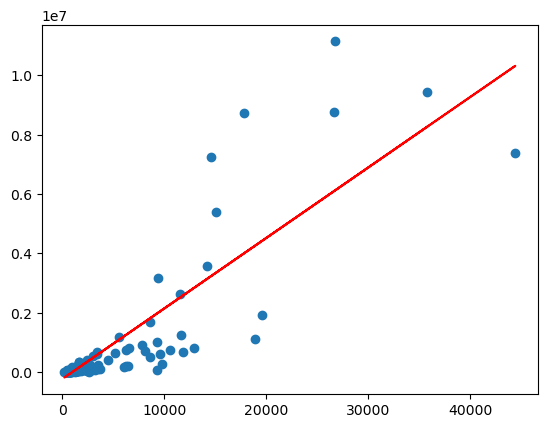

In [48]:
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
x = afterConvertDataCleaned['Gross'].to_numpy()
y = afterConvertDataCleaned['E (kWh)']
x = x.reshape(-1,1)
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')

In [49]:
##These two functions allow us to enter a building type and testing variable, and do an 
##analysis of the residiual and regression data with Electricity as our y variable. 

In [50]:
def linearRegression(building_type, testing_variable):
    linear_model = LinearRegression()
    x = building_type[testing_variable].to_numpy()
    y = building_type['E (kWh)']
    x = x.reshape(-1,1)
    linear_model.fit(x,y)
    y_hat = linear_model.predict(x)
    plt.plot(x,y,'o')
    plt.plot(x,y_hat,'r')
    print(linear_model.score(x,y))
    return linear_model

def residplot(building_type, testing_variable):
    x = building_type[testing_variable].to_numpy()
    y = building_type['E (kWh)']
    x = x.reshape(-1,1)
    y_hat = linear_model.predict(x)
    residuals = y - y_hat
    plt.scatter(y_hat, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

0.8822062069950231


LinearRegression()

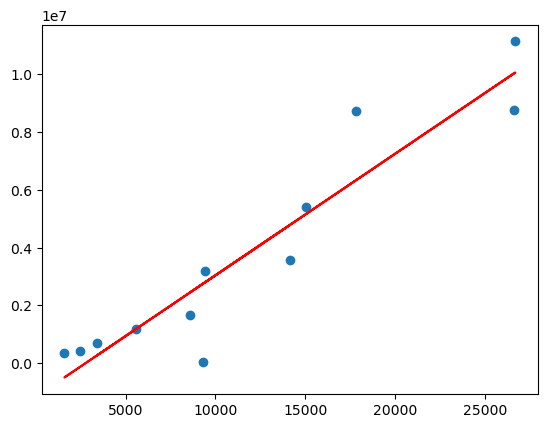

In [51]:
linearRegression(research, "Gross")

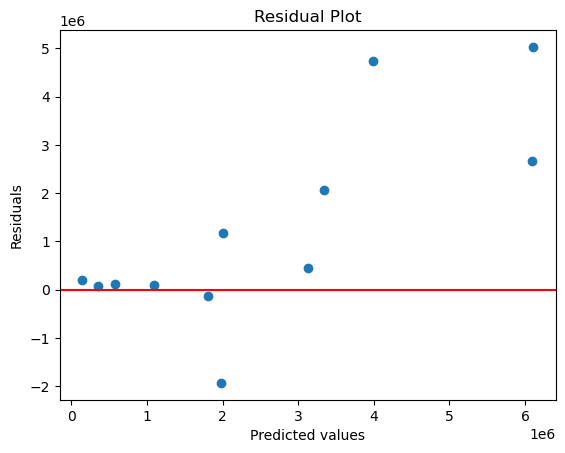

In [52]:
residplot(research, "Gross")

0.9522573112248437


LinearRegression()

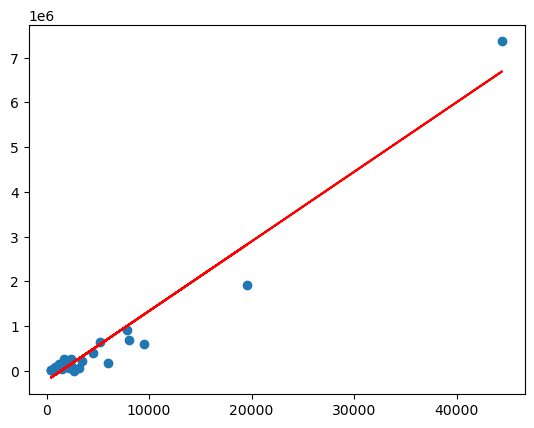

In [53]:
linearRegression(academic, "Gross")

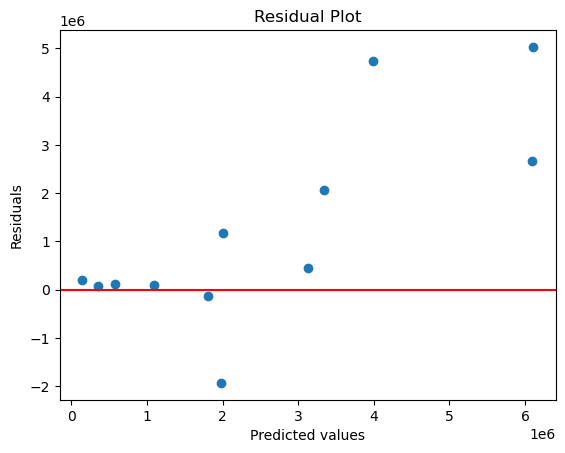

In [54]:
residplot(research, "Gross")

0.6831277871771477


LinearRegression()

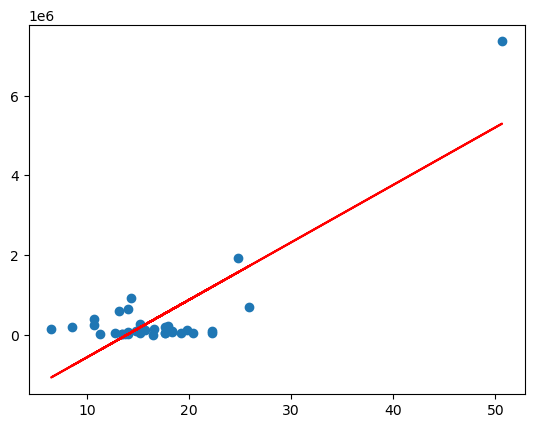

In [55]:
linearRegression(academic, "Height")

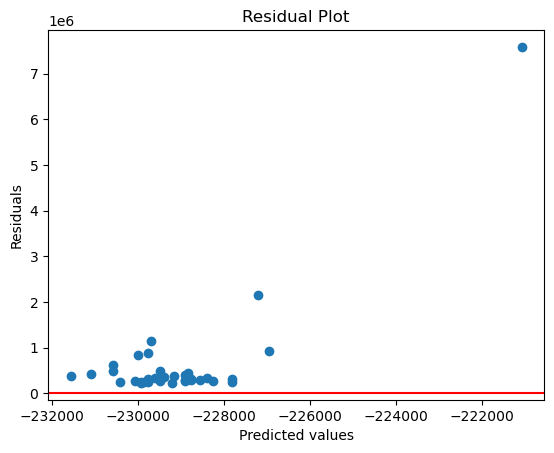

In [56]:
residplot(academic, "Height")

# Machine Learning Method 2: KN Neighbors

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
#def KNRegressor (columnNames, table):
trainingColumns = ["G(therms)", "Gross", "Height"]
dataT_train, dataT_test, labelT_train, labelT_test = train_test_split(afterConvertDataCleaned[trainingColumns], afterConvertDataCleaned['E (kWh)'], test_size=0.2)
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(dataT_train, labelT_train)
score = regressor.score(dataT_test, labelT_test)
score

0.24026021056563762

# Machine Learning Method 3&4: Decision Trees and Random Forest

In [60]:
dataT_train, dataT_test, labelT_train, labelT_test = train_test_split(afterConvertDataCleaned[trainingColumns], afterConvertDataCleaned['E (kWh)'], test_size=0.2, random_state = 0)
treeRegressor = DecisionTreeRegressor(max_depth = 4)
treeRegressor.fit(dataT_train, labelT_train)
score = treeRegressor.score(dataT_test, labelT_test)
score

0.9644071246067079

In [61]:
from sklearn.ensemble import RandomForestRegressor
forestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
forestRegressor.fit(dataT_train, labelT_train)
score = forestRegressor.score(dataT_test, labelT_test)
score

0.9427293274075925

In [62]:
##Feature importances for therms, follows by gross, followed by height

In [63]:
forestRegressor.feature_importances_

array([0.24681693, 0.5391151 , 0.21406798])

# Machine Learning Method 5: AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
ada = AdaBoostRegressor(base_estimator = forestRegressor, n_estimators=100, random_state=42)
ada.fit(dataT_train, labelT_train)
score = ada.score(dataT_test, labelT_test)
score

0.9655224627600503

# Final Predition Function

In [66]:
def predictor(gas, gross, height):
    tester = np.array([gas, gross, height]).reshape(1,-1)
    trainingColumns = ["G(therms)", "Gross", "Height"]
    dataT_train, dataT_test, labelT_train, labelT_test = train_test_split(afterConvertDataCleaned[trainingColumns], afterConvertDataCleaned['E (kWh)'], test_size=0.2, random_state = 0)
    forestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
    forestRegressor.fit(dataT_train, labelT_train)
    ada = AdaBoostRegressor(base_estimator = forestRegressor, n_estimators=100, random_state=42)
    ada.fit(dataT_train, labelT_train)
    score = ada.score(dataT_test, labelT_test)
    predicted = ada.predict(tester)
    
    x1 = afterConvertDataCleaned['G(therms)'].to_numpy()
    x2 = afterConvertDataCleaned['Gross'].to_numpy()
    x3 = afterConvertDataCleaned['Height'].to_numpy()
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    x3 = x3.reshape(-1,1)
    y = afterConvertDataCleaned['E (kWh)']
    lyst = [x1,x2,x3]
    lyst2 = [gas, gross, height]
    lyst3 = ["G(therms) vs Electricity","Gross vs Electricity", "Height vs Electricity"]
    lyst4 = ["Gas", "Gross", "Height"]
    for i in range(3):
        plt.plot(lyst[i],y,'o')
        plt.scatter(lyst2[i], predicted, c='red')
        plt.title(lyst3[i])
        plt.ylabel('Electricity(kWh)')
        plt.xlabel(lyst4[i])
        plt.show()
    print("The predicted Electricity usage is: " + str(predicted) + "(kWh), and R^2 is " + str(round(score,2)))
    #return score, predicted


/Users/tonydqz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


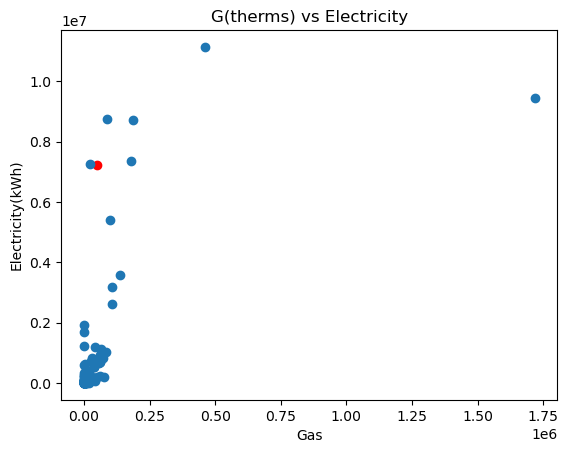

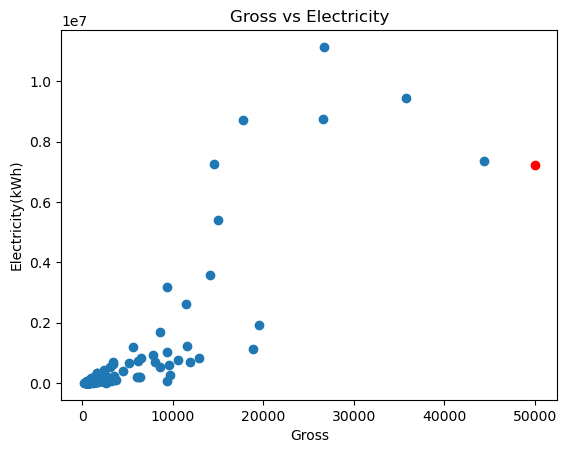

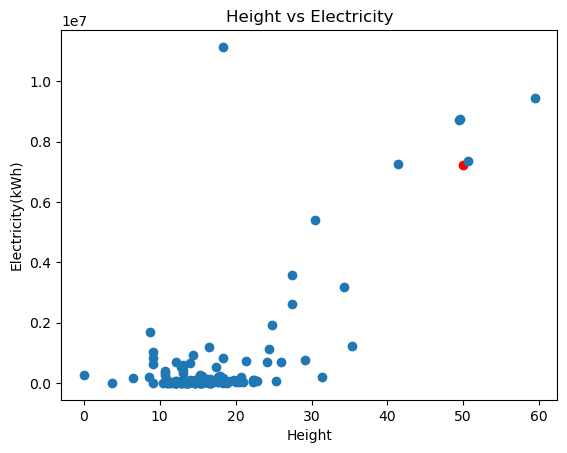

The predicted Electricity usage is: [7210431.](kWh), and R^2 is 0.97


In [67]:
predictor(50000,50000,50)